In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize2 as inv 
import os 
path  = os.getcwd()
print(path)

In [2]:
retail = pd.read_csv('{0}/online_retail2.csv'.format(path))

In [3]:
retail = retail.drop_duplicates()

In [4]:
retail = retail.dropna()
retail = retail[retail.Quantity >0]

In [5]:
retail_clean = retail.copy()
retail_clean['Revenue'] = retail['Price'] * retail['Quantity']

In [6]:
retail_clean.to_csv('./retail_clean.csv')

In [7]:
retail_clean.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [8]:
grouped = retail_clean.groupby(['StockCode','Description']).agg(sales=('Quantity', np.sum), 
                                                              revenue=('Revenue', np.sum)).reset_index()

In [9]:
grouped['revenue'] = grouped['revenue'].astype(int)

In [10]:
grouped.to_csv('./for_abc.csv', index=False)

In [11]:
a = inv.ABC(grouped[['Description', 'sales']])

In [12]:
a

,Description,sales,Percentage,Category
4031,WORLD WAR 2 GLIDERS ASSTD DESIGNS,105185,9.990307e-03,A
4751,WHITE HANGING HEART T-LIGHT HOLDER,91757,8.714937e-03,A
3283,"PAPER CRAFT , LITTLE BIRDIE",80995,7.692779e-03,A
4456,ASSORTED COLOUR BIRD ORNAMENT,78234,7.430543e-03,A
2781,MEDIUM CERAMIC TOP STORAGE JAR,77916,7.400340e-03,A
...,...,...,...,...
2109,CIRCUS PARADE LUNCHBOX,1,9.497844e-08,A
4206,6 HOOK JEWEL STAND LILAC DRESS,1,9.497844e-08,A
4255,CANDY STRIPE ROSE QUILT,1,9.497844e-08,A
4263,NEW BAROQUE WALL MIRROR,1,9.497844e-08,A


In [13]:
a.Category.value_counts()

A    5315
Name: Category, dtype: int64

In [14]:
### multi creteria abs analysis
b = inv.productmix(grouped[['Description', 'sales', 'revenue']])

In [15]:
b

,Description,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
1862,REGENCY CAKESTAND 3 TIER,24139,277656,2.292685e-03,0.177816,0.015983,0.015983,A,A,A_A
4751,WHITE HANGING HEART T-LIGHT HOLDER,91757,247048,8.714937e-03,0.018705,0.014221,0.030204,A,A,A_A
3283,"PAPER CRAFT , LITTLE BIRDIE",80995,168469,7.692779e-03,0.026398,0.009698,0.039901,A,A,A_A
5309,Manual,9391,151777,8.919426e-04,0.423176,0.008737,0.048638,A,A,A_A
4725,JUMBO BAG RED RETROSPOT,74224,134307,7.049680e-03,0.048279,0.007731,0.056369,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
3406,PINK HEART CHRISTMAS DECORATION,1,0,9.497844e-08,0.999995,0.000000,1.000000,C,C,C_C
3015,SET 12 COLOURING PENCILS DOILEY,1,0,9.497844e-08,0.999994,0.000000,1.000000,C,C,C_C
4043,CAT WITH SUNGLASSES BLANK CARD,5,0,4.748922e-07,0.999952,0.000000,1.000000,C,C,C_C
4040,HAPPY BIRTHDAY GINGER CAT CARD,2,0,1.899569e-07,0.999988,0.000000,1.000000,C,C,C_C


In [16]:
b.columns

Index(['Description', 'sales', 'revenue', 'sales_mix', 'comulative_sales',
       'revenue_mix', 'comulative_revenue', 'sales_category',
       'revenue_category', 'product_mix'],
      dtype='object')

In [17]:
b.product_mix.value_counts()

C_C    2419
A_A     775
B_B     635
C_B     412
B_C     328
A_B     320
B_A     288
C_A      74
A_C      64
Name: product_mix, dtype: int64

<AxesSubplot:xlabel='product_mix', ylabel='count'>

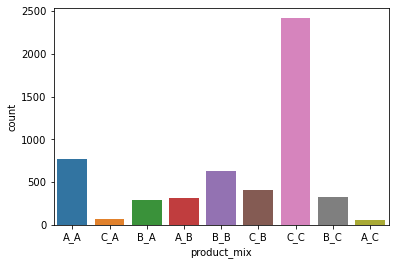

In [18]:
sns.countplot(x='product_mix', data=b)

<AxesSubplot:xlabel='product_mix', ylabel='sales'>

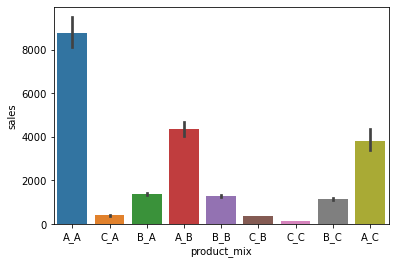

In [19]:
sns.barplot(x='product_mix', y='sales', data=b)

<AxesSubplot:xlabel='product_mix', ylabel='revenue'>

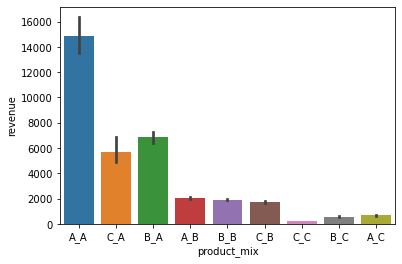

In [20]:
sns.barplot(x='product_mix', y='revenue', data=b)

In [21]:
by_store = retail_clean.groupby(['Country', 'Description']).agg(sales=('Quantity', 'sum'), 
                                                    revenue=('Revenue', 'sum')).reset_index()

In [22]:
by_store.head()

,Country,Description,sales,revenue
0,Australia,DOLLY GIRL BEAKER,200,216.0
1,Australia,I LOVE LONDON MINI BACKPACK,4,16.6
2,Australia,10 COLOUR SPACEBOY PEN,48,40.8
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384,211.2
4,Australia,12 PENCILS SMALL TUBE RED SPOTTY,24,15.6


In [23]:
mix_country = inv.productmix_storelevel(by_store['Description'],by_store['sales'], by_store['revenue'], by_store['Country'])

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/inventorize2/__init__.py:1101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])


In [24]:
product_mix = mix_country.groupby(['storeofsku', 'product_mix']).count().reset_index().iloc[:,0:3]

In [25]:
product_mix[product_mix.storeofsku=='Australia']

,storeofsku,product_mix,sku
0,Australia,A_A,176
1,Australia,A_B,79
2,Australia,A_C,7
3,Australia,B_A,76
4,Australia,B_B,104
5,Australia,B_C,26
6,Australia,C_A,8
7,Australia,C_B,59
8,Australia,C_C,298


In [31]:
#### supplier segmentation
supplier = pd.read_csv('{0}/supplier_data.csv'.format(path))

In [32]:
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596


In [33]:
supplier['risk_index'] = supplier['availability'] + supplier['no_suppliers'] + supplier['standard'] + supplier['price_fluctuation']

In [34]:
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5


In [35]:
supplier['value'] = supplier['price'] *supplier['Quantity']

In [36]:
supplier.value.describe()

count    2.400000e+01
mean     5.064812e+06
std      4.847504e+06
min      1.189500e+05
25%      7.975622e+05
50%      3.011452e+06
75%      8.499426e+06
max      1.399081e+07
Name: value, dtype: float64

In [37]:
def category(x,y):
    if((x >= 3000000) & (y >= 1)):
        return 'strategic'
    elif ((x < 3000000) & (y < 1)):
        return 'leverage'
    elif ((x < 3000000) & (y >= 1)):
        return 'Routine'

In [39]:
for i in range(supplier.shape[0]):
    supplier.loc[i, 'category'] = category(supplier.loc[i, 'value'], supplier.loc[i, 'risk_index'])

In [40]:
supplier

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value,category
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600,Routine
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780,strategic
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723,strategic
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442,strategic
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672,None
5,supplier1,product_6,0.0,0.5,0.0,0.0,3663,917,0.5,3358971,None
6,supplier2,product_7,0.5,0.0,0.5,0.0,3517,2639,1.0,9281363,strategic
7,supplier2,product_8,0.5,0.0,0.5,0.0,450,1384,1.0,622800,Routine
8,supplier2,product_9,0.5,0.0,0.5,0.0,1438,842,1.0,1210796,Routine
9,supplier2,product_10,0.5,0.0,0.5,0.0,2887,323,1.0,932501,Routine


<AxesSubplot:xlabel='value', ylabel='risk_index'>

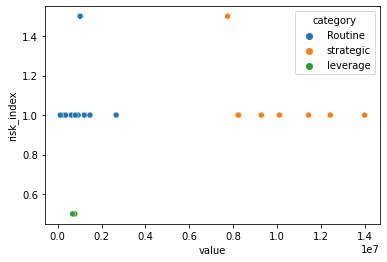

In [42]:
sns.scatterplot(x='value', y='risk_index', data=supplier, hue='category')